In [1]:
# example of inference with a pre-trained coco model
import os, sys
import re
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mrcnn.visualize import display_instances
import util
import cv2

Using TensorFlow backend.


In [2]:
# define the test configuration
class TestConfig(Config):
     NAME = "test"
     GPU_COUNT = 1
     IMAGES_PER_GPU = 1
     NUM_CLASSES = 1 + 80

In [3]:
# define 81 classes that the coco model knowns about
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [4]:
# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [5]:
# load coco model weights
rcnn.load_weights('mask_rcnn_coco.h5', by_name=True)

In [6]:
def sortOrder(name):
    return int(re.findall("\d+", name)[0])

path = "DATA3/videos2/"
img_ir_path = "RGB_to_thresh"
img_rgb_path = "IR_thresh"
imgs_rgb, imgs_ir = util.loadDataset2(path, img_ir_path, img_rgb_path)

'\n\nimg_src_ir = os.listdir(path + img_ir_path)\nimg_src_rgb = os.listdir(path + img_rgb_path)\nimg_src_ir.sort(key = sortOrder)\nimg_src_rgb.sort(key = sortOrder)\nimgs_rgb = []\nimgs_ir = []\nfor ir, rgb in zip(img_src_ir, img_src_rgb):\n    img_rgb = load_img(path + img_rgb_path + "/" + rgb)\n    img_rgb = img_to_array(img_rgb)\n    img_ir = load_img(path + img_ir_path + "/" + ir)\n    img_ir = img_to_array(img_ir)\n    imgs_rgb.append(img_rgb)\n    imgs_ir.append(img_ir)\n\nimgs_rgb = np.array(imgs_rgb)\nimgs_ir = np.array(imgs_ir)\n\n'

In [7]:
imgs_rgb.shape

(6754, 240, 320, 3)

In [10]:
id = 1000
# make prediction
results = rcnn.detect([cv2.cvtColor(imgs_rgb[id], cv2.COLOR_BGR2RGB)], verbose=0)
results2 = rcnn.detect([imgs_ir[id]], verbose=0)

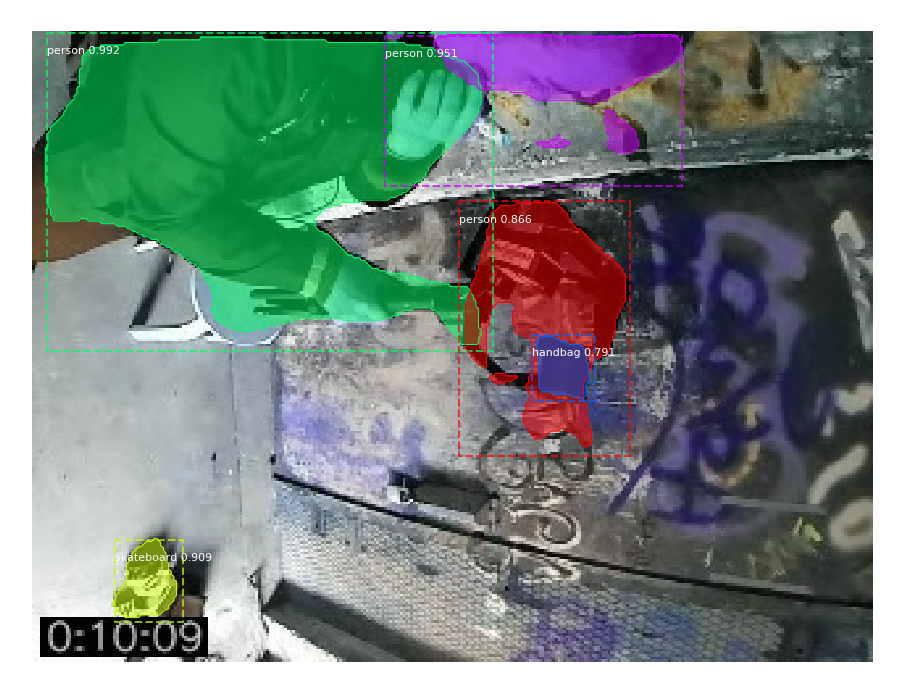

In [11]:
r = results[0]
# show photo with bounding boxes, masks, class labels and scores
display_instances(imgs_rgb[id], r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [ ]:
r = results2[0]
# show photo with bounding boxes, masks, class labels and scores
display_instances(imgs_ir[id], r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [12]:
print(r['masks'].shape)
ir_res = np.zeros((240, 320))

(240, 320, 5)


In [13]:
ma = r['masks'][:, :, 0] + r['masks'][:, :, 1] #+ r['masks'][:, :, 2]

In [14]:
ma = ma.astype(float)

In [15]:
#ma = ma * 255
ma.shape
imgs_rgb.shape

(6754, 240, 320, 3)

In [ ]:
cv2.imwrite("mask.png", ma)

In [ ]:
path = "DATA/IR VIS HAK/ir_masks"
path2 = "DATA/IR VIS HAK/rgb_masks"

for i in range(0, imgs_rgb.shape[0]):
    ir_segm = rcnn.detect([imgs_rgb[i]], verbose=0)
    ir = ir_segm[0]
    rgb_segm = rcnn.detect([imgs_ir[i]], verbose=0)
    rgb = rgb_segm[0]
    
    ir_res = ir['masks']
    if(ir_res.shape[2] != 0):
        ir_res = ir['masks'][:, :, 0]
        n = 1
        while n < ir['masks'].shape[2]:
            ir_res += ir['masks'][:, :, n]
            n+=1
    else:
        ir_res = np.zeros((240, 320))
    ir_res = ir_res.astype(float)
    ir_res = ir_res * 255
    cv2.imwrite(path+"/frame"+str(i)+".png", ir_res)
        
    rgb_res = rgb['masks']
    if(rgb_res.shape[2] != 0):
        rgb_res = rgb['masks'][:, :, 0]
        n = 1
        while n < rgb['masks'].shape[2]:
            rgb_res += rgb['masks'][:, :, n]
            n+=1
    else:
        rgb_res = np.zeros((240, 320))
    rgb_res = rgb_res.astype(float)
    rgb_res = rgb_res * 255
    cv2.imwrite(path2+"/frame"+str(i)+".png", rgb_res)
    

In [16]:
path = "DATA3/videos2/RGB_thresh"

for i in range(0, imgs_rgb.shape[0]):
    rgb_segm = rcnn.detect([cv2.cvtColor(imgs_rgb[i], cv2.COLOR_BGR2RGB)], verbose=0)
    rgb = rgb_segm[0]
        
    rgb_res = rgb['masks']
    if(rgb_res.shape[2] != 0):
        rgb_res = rgb['masks'][:, :, 0]
        n = 1
        while n < rgb['masks'].shape[2]:
            rgb_res += rgb['masks'][:, :, n]
            n+=1
    else:
        rgb_res = np.zeros((240, 320))
    rgb_res = rgb_res.astype(float)
    rgb_res = rgb_res * 255
    cv2.imwrite(path+"/frame"+str(i)+".png", rgb_res)